# Oblique tree behavior comparison
Here three different trees (RF, SPORF, MORF) are compared for its extrapolative behavior. The training sample is 100 X 2 matrix sampled from either S-XOR or spiral simulation dataset within the range of [-1,1]. The SPORF and MORF implementation is acquired from Adam Li's dev version from neurodata SPORF github repo as the PR for MORF is still in progress.

Note: SPORF is currently only available in Mac and Linux environment

In [1]:
# changing cwd
%cd ..

/home/jmshin/Desktop/workstation/extrapolation


## Load packages

In [2]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ /home/jmshin/Desktop/workstation/extrapolation/clf/SimulationData.pickle ] loaded
[ /home/jmshin/Desktop/workstation/extrapolation/clf/PosteriorData.pickle ] loaded
[ /home/jmshin/Desktop/workstation/extrapolation/clf/TrainedCLF.pickle ] loaded
[ /home/jmshin/Desktop/workstation/extrapolation/clf/EstimatedData.pickle ] loaded
[ /home/jmshin/Desktop/workstation/extrapolation/clf/HellingerData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


In [3]:
# ib.load_sampledData()

## Time and Date of the experiment

In [4]:
print(ib.date)

2021-09-22 02:21:39.114522


## Load Dependencies

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
# import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from mpl_toolkits.axes_grid1 import AxesGrid

cmap = 'PRGn'

# for figure 3
import matplotlib as mpl
from matplotlib.lines import Line2D #only for the purpose of creating the legend

import warnings
warnings.filterwarnings('ignore')

### MORF implemented version of the SPORF package is installed from Adam Li's [dev branch](https://github.com/adam2392/SPORF/tree/dev/mtorf)

In [6]:
import rerf
from rerf.rerfClassifier import rerfClassifier

rerf.check_version()

'2.0.5'

## sklearn RF parameter used for previous experiments 

In [7]:
ib.clf[1][2][2].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 128,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Matching the SPORF and MORF parameters to that of sklearn RF

In [8]:
clf_sporf = rerfClassifier(
    projection_matrix='RerF',
    n_jobs=-1,
    n_estimators=128,
    max_features='auto',
    max_depth=10
) #SPORF specification

clf_morf = rerfClassifier(
    projection_matrix='MT-MORF',
    n_jobs=-1,
    n_estimators=128,
    max_features='auto',
    max_depth=10,
    image_height=1,
    image_width=2,
    patch_height_max=1,
    patch_height_min=1,
    patch_width_max=1,
    patch_width_min=1
) #MORF specification

In [9]:
clf_sporf.get_params()

{'feature_combinations': 1.5,
 'image_height': None,
 'image_width': None,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 1,
 'n_estimators': 128,
 'n_jobs': -1,
 'oob_score': False,
 'patch_height_max': None,
 'patch_height_min': 1,
 'patch_width_max': None,
 'patch_width_min': 1,
 'projection_matrix': 'RerF',
 'random_state': None}

In [10]:
clf_morf.get_params()

{'feature_combinations': 1.5,
 'image_height': 1,
 'image_width': 2,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 1,
 'n_estimators': 128,
 'n_jobs': -1,
 'oob_score': False,
 'patch_height_max': 1,
 'patch_height_min': 1,
 'patch_width_max': 1,
 'patch_width_min': 1,
 'projection_matrix': 'MT-MORF',
 'random_state': None}

In [11]:
clf_RF = ib.clf[1][2][2]
clf_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 128,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Training sample dimension

In [12]:
ib.Ctrain_X[2].shape, ib.Ctrain_y[2].shape

((100, 2), (100,))

## Oblique tree training

In [13]:
clf_sporf.fit(ib.Ctrain_X[2], ib.Ctrain_y[2])

starting tree 1
max depth: 10
avg leaf node depth: 5.79702
avg num leaf nodes per tree: 22
num leaf nodes: 2887


rerfClassifier(max_depth=10, n_estimators=128, n_jobs=-1)

In [14]:
clf_morf.fit(ib.Ctrain_X[2], ib.Ctrain_y[2])

starting tree 1
max depth: 10
avg leaf node depth: 5.81152
avg num leaf nodes per tree: 22
num leaf nodes: 2881


rerfClassifier(image_height=1, image_width=2, max_depth=10, n_estimators=128,
               n_jobs=-1, patch_height_max=1, patch_width_max=1,
               projection_matrix='MT-MORF')

In [15]:
clf_RF.fit(ib.Ctrain_X[2], ib.Ctrain_y[2])

RandomForestClassifier(max_depth=10, n_estimators=128, n_jobs=-1)

## The grid manifold for posterior drawing

In [16]:
ib.mask = ib.generate_mask(h=0.1)

In [17]:
y_pred_sporf = clf_sporf.predict_proba(ib.mask)
y_pred_morf = clf_morf.predict_proba(ib.mask)
y_pred_RF = clf_RF.predict_proba(ib.mask)

In [18]:
y_pred_sporf.shape

(3600, 2)

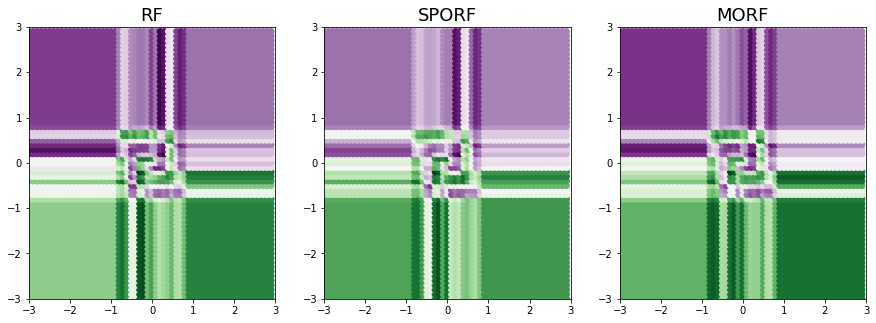

In [19]:
# y_pred
fig, ax = plt.subplots(1,3,figsize=(5*3,5))

ax[0].scatter(ib.mask[:,0],ib.mask[:,1], c=y_pred_RF[:,1], cmap='PRGn_r')
ax[1].scatter(ib.mask[:,0],ib.mask[:,1], c=y_pred_sporf[:,1], cmap='PRGn_r')
ax[2].scatter(ib.mask[:,0],ib.mask[:,1], c=y_pred_morf[:,1], cmap='PRGn_r')

for i, lab in enumerate(['RF', 'SPORF', 'MORF']):
    ax[i].set_title(lab, fontsize=18)
    ax[i].set_xlim([-3,3])
    ax[i].set_ylim([-3,3])